# Demonstrate the MaskCreator properties for microDL image segmentation

The mask creation code lives in gen_masks_seg, and outside of this notebook it can be run with the CLI create_segmentation_masks.py in the cli folder.

In [36]:
import importlib
import os

import micro_dl.input.gen_masks_seg as gen_mask
importlib.reload(gen_mask)

# input_dir = '/data/anitha/label_free_ff/split_images'
# output_dir = '/data/anitha/label_free_ff/image_tile_256-256_step_64-64_vf-0.15'

input_dir = "/Users/jenny.folkesson/Data/testdata/"
output_dir = "/Users/jenny.folkesson/Data/processed_data/image_tile_256-256_step_256-256/"

mask_inst = gen_mask.MaskCreator(input_dir=input_dir,
                        input_channel_id=0,
                        output_dir=output_dir,
                        output_channel_id=4,
                        correct_flat_field=False)

Create masks from input channel 0 and save them in channel 4.

In [34]:
mask_inst.create_masks_for_stack()

This will tile the masks in the same way the rest of the images are tiled, but it assumes you have a pickled file with all file names and crop indices.

In [37]:
# mask_dir = ['/data/anitha/label_free_ff/split_images/timepoint_0/channel_4']
# tile_idx_fname = '/data/anitha/label_free_ff/split_images/timepoint_0/mask_0-1_vf-0.15.pkl'

mask_dir = "/Users/jenny.folkesson/Data/testdata/timepoint_0/channel_4/"
tile_idx_fname = None

meta_info = mask_inst.tile_mask_stack(input_mask_dir=mask_dir,
                                      tile_index_fname=tile_idx_fname,
                                      tile_size=[256, 256],
                                      step_size=[256, 256])

Plot the mask, image and image with contours overlaid in green side by side.

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(-0.5, 2047.5, 2047.5, -0.5)

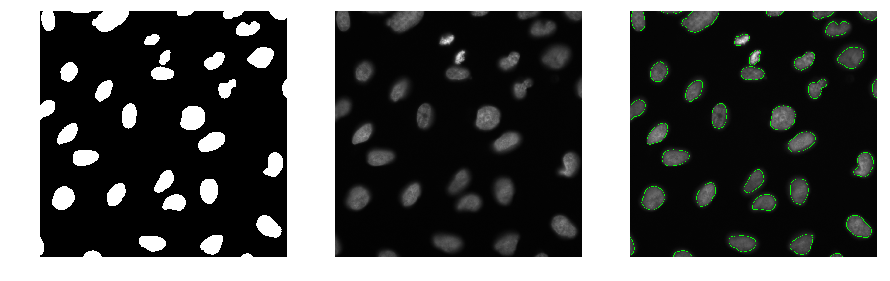

In [9]:
# mask = np.load('/data/anitha/label_free_ff/split_images/timepoint_0/channel_4/image_n249_z0.npy')
# im = np.load('/data/anitha/label_free_ff/split_images/timepoint_0/channel_0/image_n249_z0.npy')

im = cv2.imread("/Users/jenny.folkesson/Data/testdata/timepoint_0/channel_0/image_n15_z0.png", cv2.IMREAD_ANYDEPTH)
mask = np.load("/Users/jenny.folkesson/Data/testdata/timepoint_0/channel_4/image_n15_z0.png.npy")

# Convert image to uint8 color, scale to 255, and overlay a color contour
im_rgb = im / im.max() * 255
im_rgb = im_rgb.astype(np.uint8)
im_rgb = cv2.cvtColor(im_rgb, cv2.COLOR_GRAY2RGB)
_, contours, _ = cv2.findContours(mask.astype(np.uint8),
                                  cv2.RETR_TREE,
                                  cv2.CHAIN_APPROX_SIMPLE)
# Draw contours in green with linewidth 3
im_rgb = cv2.drawContours(im_rgb, contours, -1, (0, 255, 0), 3)

fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
ax[0].imshow(mask, cmap='gray')
ax[0].axis('off')
ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[2].imshow(im_rgb)
ax[2].axis('off')